### Kütüphaneleri İçeri Aktarma

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
from DataMacpy import *

DataMacpy Setup


### Veriyi Ön İşleme

In [3]:
# Veriyi içeri aktaralım.

# veri yolumuzu verelim
file_path = 'pokemon.csv'

# verimizi okuyoruz. 
pokemon_data = pd.read_csv(file_path)

print("Setup Complete")

Setup Complete


<AxesSubplot: >

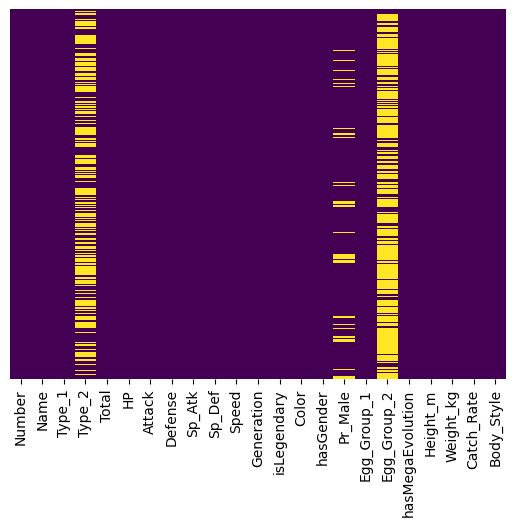

In [4]:
import seaborn as sns
sns.heatmap(pokemon_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# Veri Görselleştirme

pokemon_data.tail(5)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only
720,721,Volcanion,Fire,Water,600,80,110,120,130,90,...,Brown,False,NaN,Undiscovered,NaN,False,1.70,195.0,3,quadruped


In [6]:
# hedef kolonumuzu belirleyelim.
y_not_enc = pokemon_data.Type_1
y_not_enc

0        Grass
1        Grass
2        Grass
3         Fire
4         Fire
        ...   
716       Dark
717     Dragon
718       Rock
719    Psychic
720       Fire
Name: Type_1, Length: 721, dtype: object

In [7]:
# target verilerimiz string olduğu için LabelEncoder yapıyoruz. Her sınıfı bir sayıya atıyoruz.
l_fit = LabelEncoder().fit(y_not_enc)
y = l_fit.transform(y_not_enc)
#y = pd.DataFrame(y, columns = ["Type_1"]) # dataframe'e çevirmek için bu satırı kullanabiliriz.
y[0:20]

array([ 9,  9,  9,  6,  6,  6, 17, 17, 17,  0,  0,  0,  0,  0,  0, 12, 12,
       12, 12, 12])

In [8]:
# labellerimizi buluyoruz.
y_label = l_fit.inverse_transform([i for i in range(max(y)+1)])
label_and_num = list(zip(y_label, [i for i in range(max(y)+1)]))
label_and_num

[('Bug', 0),
 ('Dark', 1),
 ('Dragon', 2),
 ('Electric', 3),
 ('Fairy', 4),
 ('Fighting', 5),
 ('Fire', 6),
 ('Flying', 7),
 ('Ghost', 8),
 ('Grass', 9),
 ('Ground', 10),
 ('Ice', 11),
 ('Normal', 12),
 ('Poison', 13),
 ('Psychic', 14),
 ('Rock', 15),
 ('Steel', 16),
 ('Water', 17)]

In [9]:
# özniteliklerimizi belirleyelim.
X = pokemon_data
X.drop(["Number", "Type_1"], axis=1, inplace=True) # tüm verilerimizden hedef kolonumuzu çıkarıyoruz.
# Number kolonumuzu da gereksiz olduğu eğitimde gereksiz olduğu için çıkarıyoruz.
X2 = X.copy() # Burada bir X2 eğitim seti daha çıkarıp onda da farklı veri ön işlemeleri yaparak seçtiğimiz
# model üzerinden eğitim yaparak hangi veri ön işleme iyi olmuş ona bakarak seçim yapacağız
X

,Name,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Poison,318,45,49,49,65,65,45,1,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,Ivysaur,Poison,405,60,62,63,80,80,60,1,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,Venusaur,Poison,525,80,82,83,100,100,80,1,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,Charmander,NaN,309,39,52,43,60,50,65,1,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,Charmeleon,NaN,405,58,64,58,80,65,80,1,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Yveltal,Flying,680,126,131,95,131,98,99,6,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,Zygarde,Ground,600,108,100,121,81,95,95,6,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,Diancie,Fairy,600,50,100,150,100,150,50,6,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,Hoopa,Ghost,600,80,110,60,150,130,70,6,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


In [10]:
# DataMacpy kütüphanemizdeki fonksiyon ile eksik veriye sahip kolonları buluyoruz.
cols_with_missing = find_missing_cols(X)
cols_with_missing

['Type_2', 'Pr_Male', 'Egg_Group_2']

In [11]:
# Eksik bilgileri düşürüyoruz.
print(f"Eksik veriler düşürülmeden önce verilerimizin boyutu: {X.shape}")
X.drop(cols_with_missing, axis=1, inplace=True)
print(f"Eksik veriler düşürüldükten sonra verilerimizin boyutu: {X.shape}")

X2.drop(['Type_2','Egg_Group_2'], axis=1, inplace=True)
print(f"Eksik veriler düşürüldükten sonra önce X2 verilerimizin boyutu: {X2.shape}")

Eksik veriler düşürülmeden önce verilerimizin boyutu: (721, 21)
Eksik veriler düşürüldükten sonra verilerimizin boyutu: (721, 18)
Eksik veriler düşürüldükten sonra önce X2 verilerimizin boyutu: (721, 19)


In [12]:
# DataMacpy kütüphanemizdeki fonksiyon ile benzersiz birimi 15'den fazla olan veri tipi object içeren kolonları buluyoruz.
object_cols, d = calc_object_cols(X, 15)
print(f"object_cols: {object_cols}\n\n d: {d}")

# Bu kolonları düşürüyoruz çünkü her veriye özel bir benzersiz bilgi içeriyorsa overfitting olabilir.
# Eğer dönüştürmeye kalkarsak her benzersiz birim için OneHotEncoder yaparsak çok fazla kolona sahip veri seti elde ederiz.
X = X.drop(object_cols, axis = 1)
X2 = X2.drop(object_cols, axis = 1)

object_cols: ['Name']

 d: {'Name': 721}


In [13]:
# DataMacpy kütüphanemizdeki fonksiyon ile benzersiz birimi 0'dan fazla olan veri tipi object içeren
# kolonları buluyoruz.
object_cols, d = calc_object_cols(X, 0)
print(f"object_cols X: {object_cols}\n\n d: {d}")

object_cols2, d2 = calc_object_cols(X2, 0)
print(f"\n\nobject_cols X2: {object_cols2}\n\n d: {d2}")

object_cols X: ['Color', 'Egg_Group_1', 'Body_Style']

 d: {'Color': 10, 'Egg_Group_1': 15, 'Body_Style': 14}


object_cols X2: ['Color', 'Egg_Group_1', 'Body_Style']

 d: {'Color': 10, 'Egg_Group_1': 15, 'Body_Style': 14}


In [14]:
# Verilerimize OrdinalEncoder uyguluyoruz. OneHot denemesi yapılacak!
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])
X

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,318,45,49,49,65,65,45,1,False,3.0,True,10.0,False,0.71,6.9,45,9.0
1,405,60,62,63,80,80,60,1,False,3.0,True,10.0,False,0.99,13.0,45,9.0
2,525,80,82,83,100,100,80,1,False,3.0,True,10.0,True,2.01,100.0,45,9.0
3,309,39,52,43,60,50,65,1,False,7.0,True,10.0,False,0.61,8.5,45,0.0
4,405,58,64,58,80,65,80,1,False,7.0,True,10.0,False,1.09,19.0,45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,680,126,131,95,131,98,99,6,True,7.0,False,11.0,False,5.79,203.0,45,12.0
717,600,108,100,121,81,95,95,6,True,3.0,False,11.0,False,5.00,305.0,3,10.0
718,600,50,100,150,100,150,50,6,True,5.0,False,11.0,True,0.71,8.8,3,3.0
719,600,80,110,60,150,130,70,6,True,6.0,False,11.0,False,0.51,9.0,3,6.0


<AxesSubplot: >

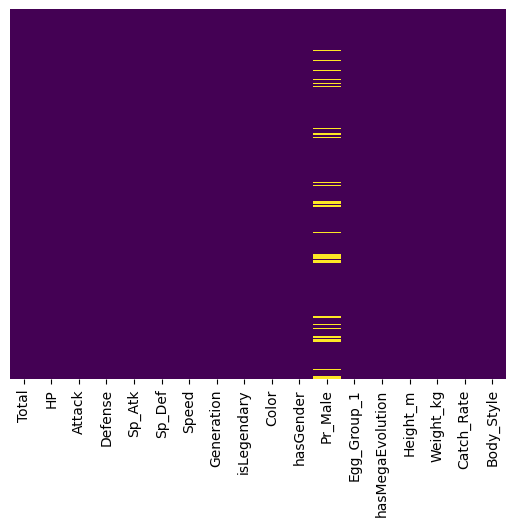

In [15]:
sns.heatmap(X2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ["Pr_Male"]),
        ('cat', categorical_transformer, object_cols2)
    ])

# Define model
model = ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                          criterion='gini', max_depth=650,
                          max_features=None, max_leaf_nodes=1000,
                          min_impurity_decrease=0.0,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0,
                          n_estimators=100)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

In [17]:
# Verilerimizi train ve validation olarak ayırıyoruz.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y, train_size=0.8, test_size=0.2, random_state=0)

### Default değerler için Model seçimi yapıyoruz

 Toplam Doğruluk: % 46.36029418924156


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,1.000000,13,13,0,Bug
1,Dark,0.222222,9,2,7,Dark
2,Dragon,1.000000,4,4,0,Dragon
3,Electric,0.285714,7,2,5,Dark
4,Fairy,0.666667,3,2,1,Fairy
5,Fighting,0.200000,5,1,4,Normal
6,Fire,0.454545,11,5,6,Fire
7,Flying,0.000000,1,0,1,Psychic
8,Ghost,0.333333,3,1,2,Ghost
9,Grass,0.923077,13,12,1,Grass


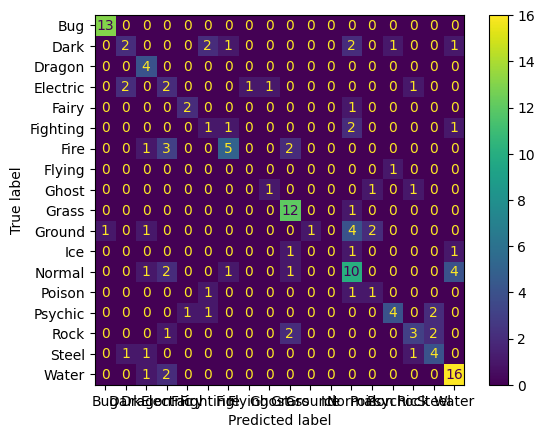

In [18]:
model_fit_and_predict(ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                          criterion='gini', max_depth=650,
                          max_features=None, max_leaf_nodes=1000,
                          min_impurity_decrease=0.0,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0,
                          n_estimators=100), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 47.79699102067523


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,1.000000,13,13,0,Bug
1,Dark,0.222222,9,2,7,Dark
2,Dragon,0.500000,4,2,2,Dragon
3,Electric,0.428571,7,3,4,Electric
4,Fairy,0.666667,3,2,1,Fairy
5,Fighting,0.200000,5,1,4,Normal
6,Fire,0.727273,11,8,3,Fire
7,Flying,1.000000,1,1,0,Flying
8,Ghost,0.666667,3,2,1,Ghost
9,Grass,0.769231,13,10,3,Grass


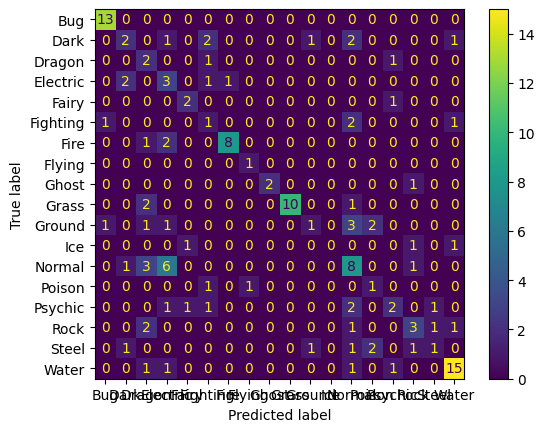

In [19]:
model_fit_and_predict(clf, y_label, X_train2, y_train2, X_valid2, y_valid2)

In [20]:
preprocessor

ColumnTransformer(transformers=[('num', SimpleImputer(strategy='constant'),
                                 ['Pr_Male']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Color', 'Egg_Group_1', 'Body_Style'])])

In [21]:
categorical_transformer

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])